In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [19]:
fairgp_files = [
    ('../results/propublica-opp-odds_2018-09-21/propublica-recidivism_race_numerical-binsensitive-origin.csv', 'Propublica (race)'),
    ('../results/propublica-opp-odds_2018-09-21/propublica-recidivism_sex_numerical-binsensitive-origin.csv', 'Propublica (gender)'),
]

fairgp = ph.parse_all(fairgp_files)
data = fairgp

In [3]:
def label_change(label):
    parts = label.split('_')
    tnr0 = float(parts[6])
    tnr1 = float(parts[8])
    tpr = float(parts[10])
    if (tnr0 in [0.7]) and (tnr1 in [0.7]) and (tpr in [.6, .7, .8, .9]):
        in_True = parts[4] == "True"
        optional_star = "*" if in_True else ""
        return f"FairGPopp{optional_star}, 0-TNR={tnr0}, 1-TNR={tnr1}, TPR={tpr}", not in_True

tpr_data = ph.filter_transform_labels(data, label_change)
def real_tprdiff(fake_tprdiff):
    return 1 - fake_tprdiff
tpr_data = ph.transform_all(tpr_data, 'race-TPRDiff', real_tprdiff)
tpr_data = ph.transform_all(tpr_data, 'sex-TPRDiff', real_tprdiff)

In [4]:
#data = ph.reorder_entries(data, [0, 1, 2, 3, 4, 5])

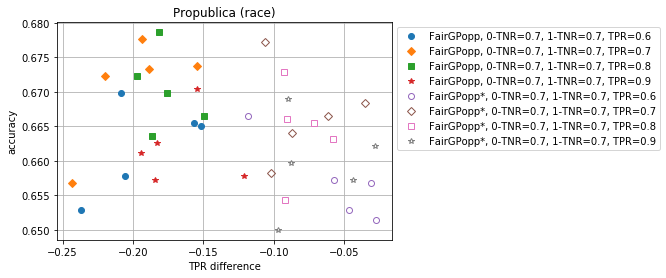

In [5]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tpr_data[0], ('race-TPRDiff', 'TPR difference'), ('accuracy', 'accuracy'), legend_outside=True)

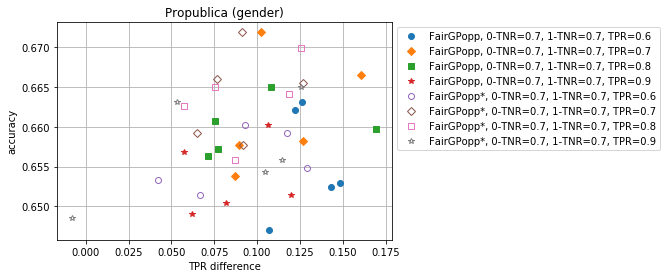

In [6]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tpr_data[1], ('sex-TPRDiff', 'TPR difference'), ('accuracy', 'accuracy'), legend_outside=True)

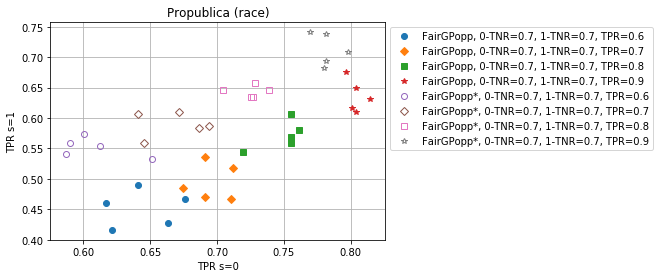

In [7]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tpr_data[0], ('0-TPR-race', 'TPR s=0'), ('1-TPR-race', 'TPR s=1'), legend_outside=True)

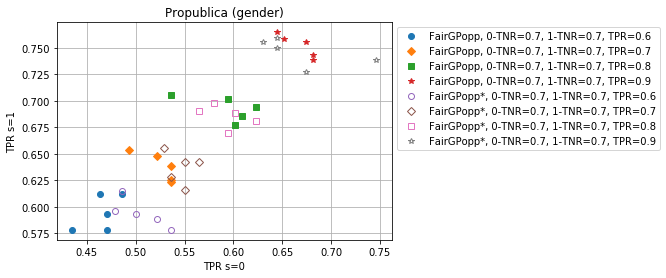

In [8]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tpr_data[1], ('0-TPR-sex', 'TPR s=0'), ('1-TPR-sex', 'TPR s=1'), legend_outside=True)

In [20]:
def label_change(label):
    parts = label.split('_')
    tnr0 = float(parts[6])
    tnr1 = float(parts[8])
    tpr = float(parts[10])
    if (tnr0, tnr1) in [(.1, .1), (.1, .1), (.3, .3), (.5, .5), (.7, .7), (.9, .9)] and tpr == .9:
        in_True = parts[4] == "True"
        optional_star = "*" if in_True else ""
        return f"FairGPopp{optional_star}, 0-TNR={tnr0}, 1-TNR={tnr1}, TPR={tpr}", not in_True

tnr_data = ph.filter_transform_labels(data, label_change)
def real_tnrdiff(fake_tnrdiff):
    return 1 - fake_tnrdiff
tnr_data = ph.transform_all(tnr_data, 'race-TNRDiff', real_tnrdiff)
tnr_data = ph.transform_all(tnr_data, 'sex-TNRDiff', real_tnrdiff)

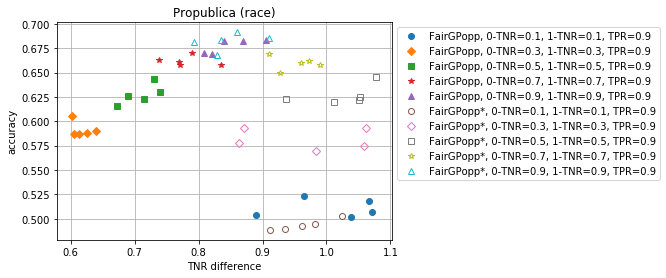

In [27]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tnr_data[0], ('race-TNRRatio', 'TNR difference'), ('accuracy', 'accuracy'), legend_outside=True)

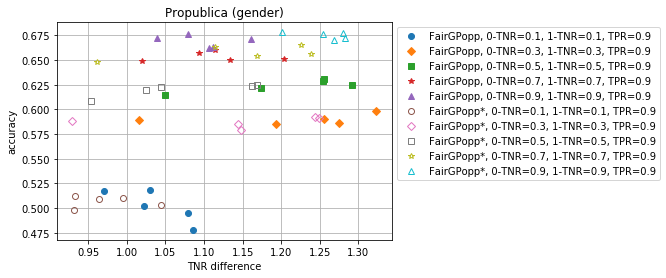

In [26]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tnr_data[1], ('sex-TNRRatio', 'TNR difference'), ('accuracy', 'accuracy'), legend_outside=True)

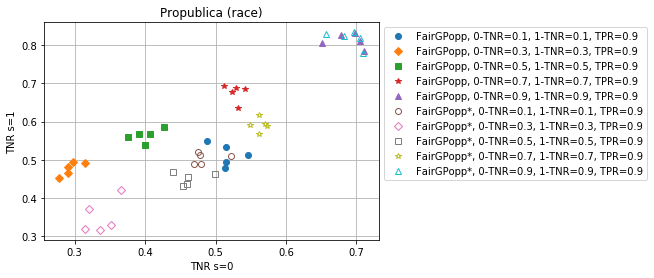

In [24]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tnr_data[0], ('0-TNR-race', 'TNR s=0'), ('1-TNR-race', 'TNR s=1'), legend_outside=True)

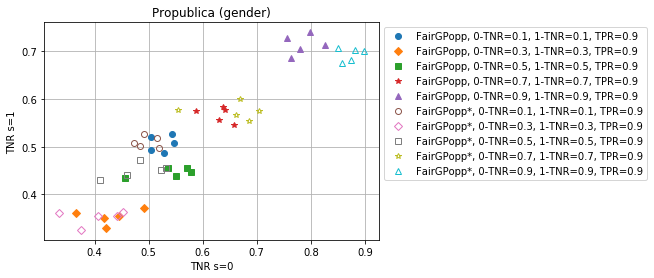

In [25]:
fig, plot = plt.subplots(figsize=(6, 4))
legend = ph.scatter(plot, tnr_data[1], ('0-TNR-sex', 'TNR s=0'), ('1-TNR-sex', 'TNR s=1'), legend_outside=True)